In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import numpy as np

In [151]:
VGgameDF = pd.read_csv('vgsales.csv')

In [152]:
VGgameDF

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#### 데이터 전처리 - 결측치 제거

In [153]:
VGgameDF = VGgameDF.iloc[:,[2,4,5,6,7,8,10]]

In [154]:
VGgameDF.isnull().sum()

Platform         0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Global_Sales     0
dtype: int64

In [155]:
len(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list())

58

In [156]:
VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)

C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\1161423503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher'].isnull()].index.to_list(), inplace=True)
C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\1161423503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF.drop(VGgameDF[VGgameDF['Publisher']=='Unknown'].index.to_list(), inplace=True)


In [157]:
VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Wii,Sports,Nintendo,41.49,29.02,3.77,82.74
1,NES,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Wii,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Wii,Sports,Nintendo,15.75,11.01,3.28,33.00
4,GB,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16593,GBA,Platform,Kemco,0.01,0.00,0.00,0.01
16594,GC,Shooter,Infogrames,0.01,0.00,0.00,0.01
16595,PS2,Racing,Activision,0.00,0.00,0.00,0.01
16596,DS,Puzzle,7G//AMES,0.00,0.01,0.00,0.01


In [158]:
## 플랫폼 통합 (4개로 축약)
Xbox = ['X360', 'XOne', 'XB']  # Xbox 계열
PS =['PS2', 'PS3', 'PS4', 'PS', 'PSP', 'PSV']  # PlayStation 계열
Nintendo = ['Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'SNES', 'NES', 'N64', 'GC']   # 닌텐도

platforms = [Xbox, PS, Nintendo]
platforms_n = ['Xbox', 'PS', 'Nintendo']

idx = 0
for l in platforms:
    # print(l)
    for p in l:
        # print(p)
        VGgameDF['Platform'] = VGgameDF['Platform'].replace(p,f"{platforms_n[idx]}")
    idx+=1
other = ['PC', '2600', 'GEN', 'DC', 'SAT', 'SCD','WS', 'NG', 'TG16', '3DO', 'GG', 'PCFX']
for o in other:
    VGgameDF['Platform'] = VGgameDF['Platform'].replace(o,"other")

print(VGgameDF['Platform'].unique()) # 실행확인

['Nintendo' 'Xbox' 'PS' 'other']


C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\3422854590.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF['Platform'] = VGgameDF['Platform'].replace(p,f"{platforms_n[idx]}")
C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\3422854590.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VGgameDF['Platform'] = VGgameDF['Platform'].replace(o,"other")


#### 데이터 전처리 - 플랫폼 확인

C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\3493361294.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('tab20b')


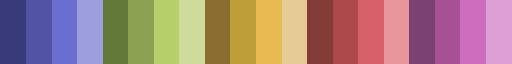

In [328]:
from matplotlib import cm
# # color = ['rebeccapurple','mediumorchid','violet',  'lavender']
platform_counts = VGgameDF['Platform'].value_counts()
# cmap = cm.get_cmap('tab20b', len(platform_counts))  # tab20b에서 필요한 색상 개수만큼 색을 추출
colors = [cmap(i) for i in range(len(platform_counts))] 
cmap = cm.get_cmap('tab20b')
# print(cmap(15,18))
cmap

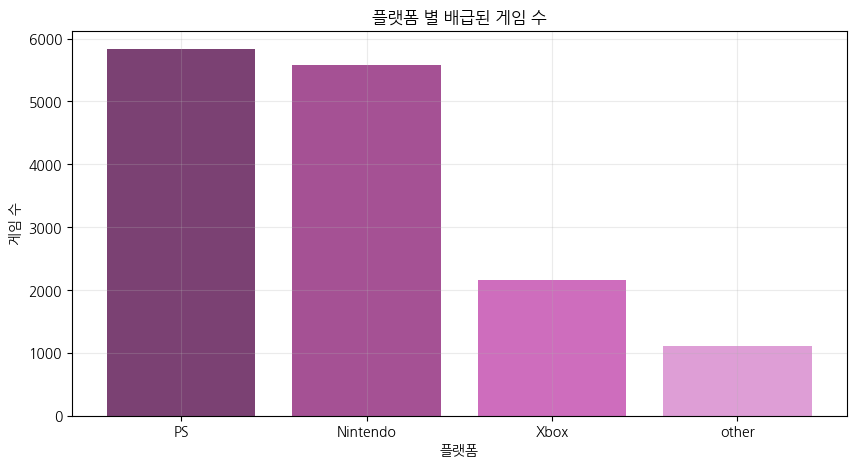

In [332]:

# indigo
# lightpurple 'lavender'
plt.figure(figsize=(10,5))
plt.grid(True, alpha=0.25)
plt.bar(VGgameDF['Platform'].value_counts().index, VGgameDF['Platform'].value_counts(), color = [cmap(16), cmap(17),cmap(18),cmap(19)])
plt.xlabel('플랫폼')
plt.ylabel('게임 수')
plt.title('플랫폼 별 배급된 게임 수')
plt.show()


#### 데이터 전처리 - 배급처 확인

In [160]:
tempDF = VGgameDF

In [161]:
## 배급처 거름망
# (VGgameDF['Publisher'].value_counts()> 15).value_counts()

gameDF = pd.DataFrame((VGgameDF['Publisher'].value_counts() > 15))
Up_Pub_list = gameDF[gameDF['count']==True].index.to_list()
VGgameDF = VGgameDF[VGgameDF['Publisher'].isin(Up_Pub_list)]

VGgameDF

,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,Nintendo,Sports,Nintendo,41.49,29.02,3.77,82.74
1,Nintendo,Platform,Nintendo,29.08,3.58,6.81,40.24
2,Nintendo,Racing,Nintendo,15.85,12.88,3.79,35.82
3,Nintendo,Sports,Nintendo,15.75,11.01,3.28,33.00
4,Nintendo,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...
16591,other,Adventure,Ubisoft,0.01,0.00,0.00,0.01
16592,Nintendo,Simulation,Destineer,0.01,0.00,0.00,0.01
16593,Nintendo,Platform,Kemco,0.01,0.00,0.00,0.01
16594,Nintendo,Shooter,Infogrames,0.01,0.00,0.00,0.01


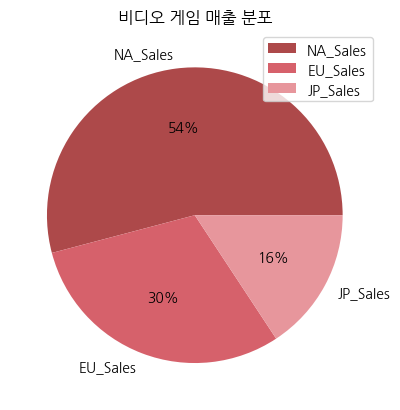

In [344]:
# [VGgameDF['NA_Sales'].sum(), VGgameDF['EU_Sales'].sum(),VGgameDF['JP_Sales'].sum()]

plt.pie([VGgameDF['NA_Sales'].sum(), VGgameDF['EU_Sales'].sum(),VGgameDF['JP_Sales'].sum()],
        labels = ['NA_Sales','EU_Sales','JP_Sales'] ,colors=[cmap(13),cmap(14),cmap(15)], autopct='%.0f%%')
plt.title('비디오 게임 매출 분포')
plt.legend(['NA_Sales','EU_Sales','JP_Sales'])
plt.show()

## 인코딩
 - 배급사 -> 라벨
 - 플랫폼,장르 -> 원핫

In [162]:
targetSR = pd.get_dummies(VGgameDF['Platform'])
featureDF = VGgameDF.iloc[:,[1,2,3,4,5,6]]

# targetSR = VGgameDF['Platform']
# featureDF = (VGgameDF.iloc[:,[1,2,3,4,5,6]])

In [163]:
# 배급사 라벨인코딩
from sklearn.preprocessing import LabelEncoder
Pub_cod = featureDF['Publisher']
lencoder = LabelEncoder()
lencoder.fit(Pub_cod)
Pub_cod = lencoder.transform(Pub_cod)
# np.array(Pub_cod)
featureDF['Publisher'] = Pub_cod
featureDF

# 장르 원핫
Genre = pd.get_dummies(featureDF['Genre'])
Genre

C:\Users\kjy19\AppData\Local\Temp\ipykernel_7360\3237567109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  featureDF['Publisher'] = Pub_cod


,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
16591,False,True,False,False,False,False,False,False,False,False,False,False
16592,False,False,False,False,False,False,False,False,False,True,False,False
16593,False,False,False,False,True,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,True,False,False,False


In [164]:
# 피쳐 합본
featuresDF = pd.DataFrame()
idx = 0 
for c in Genre.columns.to_list():
    featuresDF[c] = Genre.iloc[:, idx]
    idx += 1


ddx = 1
for f in featureDF.columns.to_list()[1:]:
    featuresDF[f] = featureDF.iloc[:, ddx]
    # print(featureDF.iloc[:, ddx][0])
    ddx = ddx + 1
    print(ddx)


featureDF = featuresDF

2
3
4
5
6


#### Decision Tree

In [165]:
# 모듈로딩
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [166]:
targetSR

,Nintendo,PS,Xbox,other
0,True,False,False,False
1,True,False,False,False
2,True,False,False,False
3,True,False,False,False
4,True,False,False,False
...,...,...,...,...
16591,False,False,False,True
16592,True,False,False,False
16593,True,False,False,False
16594,True,False,False,False


In [167]:
featureDF

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,True,False,69,41.49,29.02,3.77,82.74
1,False,False,False,False,True,False,False,False,False,False,False,False,69,29.08,3.58,6.81,40.24
2,False,False,False,False,False,False,True,False,False,False,False,False,69,15.85,12.88,3.79,35.82
3,False,False,False,False,False,False,False,False,False,False,True,False,69,15.75,11.01,3.28,33.00
4,False,False,False,False,False,False,False,True,False,False,False,False,69,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16591,False,True,False,False,False,False,False,False,False,False,False,False,102,0.01,0.00,0.00,0.01
16592,False,False,False,False,False,False,False,False,False,True,False,False,27,0.01,0.00,0.00,0.01
16593,False,False,False,False,True,False,False,False,False,False,False,False,52,0.01,0.00,0.00,0.01
16594,False,False,False,False,False,False,False,False,True,False,False,False,46,0.01,0.00,0.00,0.01


In [168]:
# targetSR.reshape(-1,1)

# np.array(targetSR).reshape(-1,1)

In [169]:
# lencoder = LabelEncoder()
# lencoder.fit(targetDF)
# lencoder.transform(targetDF)
# targetSR = np.array(targetDF)

In [170]:
# targetSR = pd.get_dummies(targetSR)

##### 플랫폼, 장르 원핫

In [171]:
# featureDF = pd.get_dummies(featureDF)
# targetSR = pd.get_dummies(targetSR)

In [172]:
print(f'featureDF - shape : {featureDF.shape}, ndim : {featureDF.ndim}')
print(f'targetSR - shape : {targetSR.shape}, ndim : {targetSR.ndim}')

featureDF - shape : (14672, 17), ndim : 2
targetSR - shape : (14672, 4), ndim : 2


In [173]:
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, random_state=10, stratify=targetSR)

In [174]:
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [175]:
# print(f'[dt_model.classes_] {dt_model.classes_}')
print(f'[dt_model.n_classes_] {dt_model.n_classes_}')
print(f'[dt_model.max_features] {dt_model.max_features_}')
print(f'[dt_model.feature_names_in_] {dt_model.feature_names_in_}')
print(f'[dt_model.feature_importances_] {dt_model.feature_importances_}')

[dt_model.n_classes_] [2 2 2 2]
[dt_model.max_features] 17
[dt_model.feature_names_in_] ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy' 'Publisher'
 'NA_Sales' 'EU_Sales' 'JP_Sales' 'Global_Sales']
[dt_model.feature_importances_] [0.02468173 0.01159577 0.01109401 0.01795674 0.01006538 0.00762426
 0.01154774 0.0119991  0.01773553 0.01272325 0.01654985 0.00982063
 0.25886545 0.1834809  0.16798829 0.06772916 0.15854222]


In [176]:
train_score = dt_model.score(X_train, y_train)
test_score = dt_model.score(X_test, y_test)
print(f'train_score : test_score = {train_score:.4f} : {test_score:.4f}')

train_score : test_score = 0.9495 : 0.6022


#### 예측

In [177]:
# dt_model.predict()
X_new = [[False,False,False,False,False,
          False,False,False,False,False,  # 장르 12 피쳐 중 1개만 True
          True,False,                     
          69, 41.49, 29.02, 3.77, 82.74]] # 배급사 레이블 번호 + 가격 4종류



def pred_ML(X_new):
       y_pred = dt_model.predict(X_new)
       proba = dt_model.predict_proba(X_new)
       if y_pred[0][0] == True:
              y_pred = 'Nintendo'
       elif y_pred[0][1] == True:
              y_pred = 'PS'
       elif y_pred[0][2] == True:
              y_pred = 'Xbox'
       else:
              y_pred = 'other'
       # print(f'{y_pred} \n {proba}')

       return [y_pred, proba]

pred_ML(X_new)    

c:\Users\kjy19\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\kjy19\anaconda3\envs\ML_38\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


['Nintendo',
 [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]]

In [178]:
X_test

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
10080,False,False,False,True,False,False,False,False,False,False,False,False,67,0.06,0.04,0.00,0.11
7327,True,False,False,False,False,False,False,False,False,False,False,False,5,0.16,0.04,0.00,0.21
9927,False,False,False,False,False,False,False,False,False,True,False,False,31,0.11,0.00,0.00,0.12
365,False,False,False,False,False,False,False,False,True,False,False,False,31,2.14,1.08,0.02,3.53
4786,False,False,False,True,False,False,False,False,False,False,False,False,83,0.13,0.06,0.16,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2414,False,False,False,False,False,False,False,True,False,False,False,False,87,0.54,0.06,0.21,0.86
6040,True,False,False,False,False,False,False,False,False,False,False,False,28,0.16,0.10,0.00,0.29
13155,True,False,False,False,False,False,False,False,False,False,False,False,55,0.00,0.00,0.05,0.05
13431,False,False,False,False,True,False,False,False,False,False,False,False,80,0.03,0.01,0.00,0.05


In [179]:
pred_ML(X_test[X_test.index == 1841])[0]

'Xbox'

In [180]:
y_test[y_test.index == 1841].columns

Index(['Nintendo', 'PS', 'Xbox', 'other'], dtype='object')

In [200]:
type(bool(y_test.iloc[1841]['Nintendo']))

bool

In [205]:
y_test[y_test.index == 1841]['Nintendo'].any()

False

In [207]:
def y_True_return(idx):
    y_temp = y_test[y_test.index == idx]
    for c in y_temp.columns.to_list():
        if y_temp[c].any() == True:
            re = c

    return re
        

In [368]:
import random as rd
for i in range(5):
    x = rd.randint(0,3368)
    x = list(X_test.index)[x]
    print(f'정답 : {y_True_return(x)}')
    print(f'Predict : {tempP[0]}  ||   Proba : {tempP[1]}')

    tempP = pred_ML(X_test[X_test.index == x])
    print()

정답 : PS
Predict : Nintendo  ||   Proba : [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]

정답 : Nintendo
Predict : Nintendo  ||   Proba : [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]

정답 : PS
Predict : Nintendo  ||   Proba : [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]

정답 : Nintendo
Predict : Nintendo  ||   Proba : [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]

정답 : PS
Predict : Nintendo  ||   Proba : [array([[0., 1.]]), array([[1., 0.]]), array([[1., 0.]]), array([[1., 0.]])]



In [ ]:
rd.randint

##### 트리 그림

In [ ]:
params = {'max_depth':[12,9,4,3],
       'min_samples_leaf' : [5,3,2]}

gscv=GridSearchCV(DecisionTreeClassifier(), 
                  param_grid=params, 
                  refit=True, 
                  return_train_score=True)
gscv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [12, 9, 4, 3],
                         'min_samples_leaf': [5, 3, 2]},
             return_train_score=True)

In [ ]:
print(f'[gscv.best_params_] {gscv.best_params_}')
print(f'[gscv.best_score_] {gscv.best_score_}')
print(f'[gscv.best_estimator_] {gscv.best_estimator_}')
# print(f'[gscv.cv_results_] {gscv.cv_results_}')

cv_resultDF = pd.DataFrame(gscv.cv_results_)

best_model = gscv.best_estimator_
print(f'[best_model.max_depth] : {best_model.max_depth}')
print(f'[best_model.min_samples_leaf] : {best_model.min_samples_leaf}')

[gscv.best_params_] {'max_depth': 12, 'min_samples_leaf': 3}
[gscv.best_score_] 0.5638862500516295
[gscv.best_estimator_] DecisionTreeClassifier(max_depth=12, min_samples_leaf=3)
[best_model.max_depth] : 12
[best_model.min_samples_leaf] : 3


In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(best_model, out_file = 'tree.dot',
                feature_names=best_model.feature_names_in_,
                impurity=True, filled=True, rounded=True)

In [ ]:
import graphviz
with open('tree.dot') as f:
    dot_data = f.read()

graphviz.Source(dot_data)